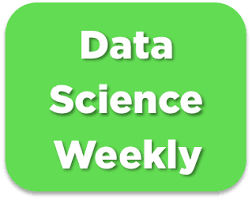

# Challenge : predict conversions 🏆🏆
In this project, you will participate to a machine learning competition like the ones that are organized by https://www.kaggle.com/. You will be able to work with jupyter notebooks as usual, but in the end you'll have to submit your model's predictions to your teacher/TA, so your model's performances will be evaluated in an independent way. The scores achieved by the different teams will be stored into a leaderboard 🏅🏅

## Description of a machine learning challenge 🚴🚴
- In machine learning challenges, the dataset is always separated into to files :
    - *data_train.csv* contains **labelled data**, which means there are both X (explanatory variables) and Y (the target to be predicted). You will use this file to train your model as usual : make the train/test split, preprocessings, assess performances, try different models, fine-tune hyperparameters etc...
    - *data_test.csv* contains "new" examples that have not be used to train the model, in the same format as in *data_train.csv* but it is **unlabeled**, which means the target Y has been removed from the file. Once you've trained a model, you will use *data_test.csv* to make some predictions that you will send to the organizing team. They will then be able to assess the performances of your model in an independent way, by preventing cheating 🤸
- Your model's predictions will be compared to the true labels and releases a leaderboard where the scores of all the teams around the world are stored
- All the participants are informed about the metric that will be used to assess the scores. You have to make sure you're using the same metric to evaluate your train/test performances !

## Company's Description 📇
www.datascienceweekly.org is a famous newsletter curated by independent data scientists. Anyone can register his/her e-mail address on this website to receive weekly news about data science and its applications !

## Project 🚧
The data scientists who created the newsletter would like to understand better the behaviour of the users visiting their website. They would like to know if it's possible to build a model that predicts if a given user will subscribe to the newsletter, by using just a few information about the user. They would like to analyze the parameters of the model to highlight features that are important to explain the behaviour of the users, and maybe discover a new lever for action to improve the newsletter's conversion rate.

They designed a competition aiming at building a model that allows to predict the *conversions* (i.e. when a user will subscribe to the newsletter). To do so, they open-sourced a dataset containing some data about the traffic on their website. To assess the rankings of the different competing teams, they decided to use the **f1-score**.

## Goals 🎯
The project can be cut into four steps :
- Part 1 : make an EDA and the preprocessings and train a baseline model with the file *data_train.csv*
- Part 2 : improve your model's f1-score on your test set (you can try feature engineering, feature selection, regularization, non-linear models, hyperparameter optimization by grid search, etc...)
- Part 3 : Once you're satisfied with your model's score, you can use it to make some predictions with the file *data_test.csv*. You will have to dump the predictions into a .csv file that will be sent to Kaggle (actually, to your teacher/TA 🤓). You can make as many submissions as you want, feel free to try different models !
- Part 4 : Take some time to analyze your best model's parameters. Are there any lever for action that would help to improve the newsletter's conversion rate ? What recommendations would you make to the team ?

## Deliverable 📬
To complete this project, your team should: 
- Create some relevant figures for EDA
- Train at least one model that predicts the conversions and evaluate its performances (f1, confusion matrices)
- Make at least one submission to the leaderboard 
- Analyze your best model's parameters and try to make some recommendations to improve the conversion rate in the future


## Helpers 🦮

To help you with the methodology, we created a template (**02-Conversion_rate_challenge_template.ipynb**) in which all the training/predictions steps are implemented for a very basic model (logistic regression with only one variable). Please use this template and feel free to change the EDA/preprocessing/training steps ! May the force be with you 🧨🧨 

# Part 1 — Exploratory Data Analysis 

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, f1_score


In [43]:
train_df = pd.read_csv("/Users/wafazeghouane/Desktop/Data_science_Full stack/Final projects/Conversion rate challenge/conversion_data_train.csv")
test_df = pd.read_csv("/Users/wafazeghouane/Desktop/Data_science_Full stack/Final projects/Conversion rate challenge/conversion_data_test.csv")


In [44]:
train_df.head()

,country,age,new_user,source,total_pages_visited,converted
0,China,22,1,Direct,2,0
1,UK,21,1,Ads,3,0
2,Germany,20,0,Seo,14,1
3,US,23,1,Seo,3,0
4,US,28,1,Direct,3,0


In [45]:
train_df.describe(include="all")

,country,age,new_user,source,total_pages_visited,converted
count,284580,284580.000000,284580.000000,284580,284580.000000,284580.000000
unique,4,NaN,NaN,3,NaN,NaN
top,US,NaN,NaN,Seo,NaN,NaN
freq,160124,NaN,NaN,139477,NaN,NaN
mean,NaN,30.564203,0.685452,NaN,4.873252,0.032258
std,NaN,8.266789,0.464336,NaN,3.341995,0.176685
min,NaN,17.000000,0.000000,NaN,1.000000,0.000000
25%,NaN,24.000000,0.000000,NaN,2.000000,0.000000
50%,NaN,30.000000,1.000000,NaN,4.000000,0.000000
75%,NaN,36.000000,1.000000,NaN,7.000000,0.000000


In [46]:
train_df.isna().sum()

country                0
age                    0
new_user               0
source                 0
total_pages_visited    0
converted              0
dtype: int64

In [47]:
train_df.dtypes

country                object
age                     int64
new_user                int64
source                 object
total_pages_visited     int64
converted               int64
dtype: object

In [48]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284580 entries, 0 to 284579
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   country              284580 non-null  object
 1   age                  284580 non-null  int64 
 2   new_user             284580 non-null  int64 
 3   source               284580 non-null  object
 4   total_pages_visited  284580 non-null  int64 
 5   converted            284580 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 13.0+ MB


In [49]:
train_df.shape

(284580, 6)

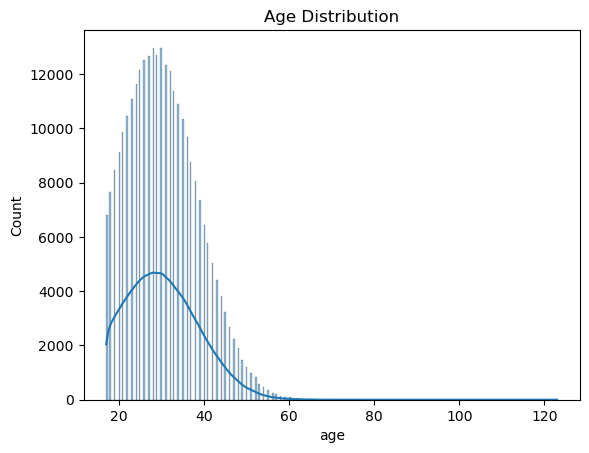

In [50]:
#Age Distribution
sns.histplot(train_df['age'], kde=True)
plt.title('Age Distribution')
plt.show()

# We add kde : To understand how densely values are concentrated at different points.

The peak is between 25 and 35 years old, where the user count is highest.

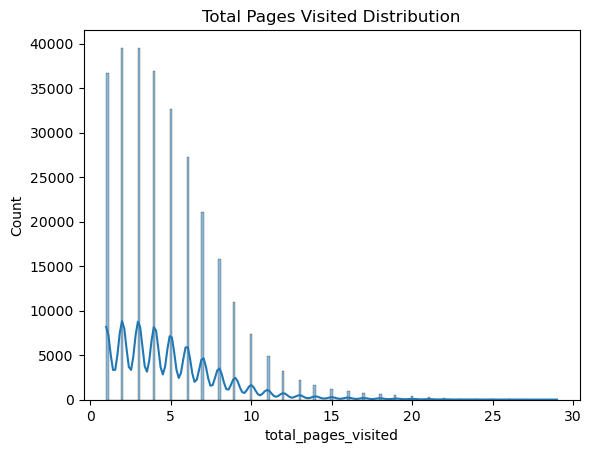

In [51]:
#Total Pages Visited
sns.histplot(train_df['total_pages_visited'], kde=True)
plt.title('Total Pages Visited Distribution')
plt.show()


The majority of users visit between 1 and 5 pages.

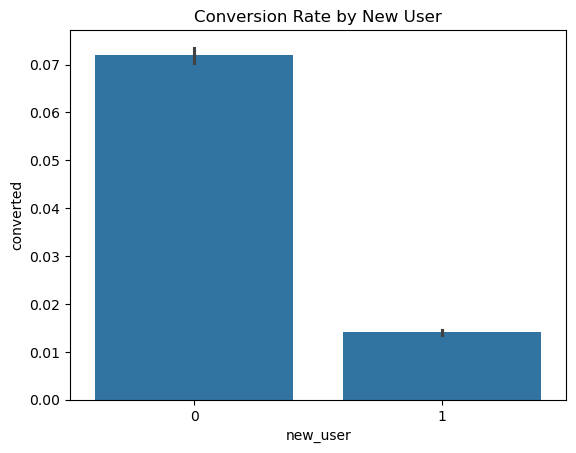

In [52]:
#Conversion Rate by New User
sns.barplot(x='new_user', y='converted', data=train_df)
plt.title('Conversion Rate by New User')
plt.show()


Returning users convert significantly more than new users.

The conversion rate for returning users is over 7%, while for new users it's just about 1.5%.

This indicates that user familiarity, trust, or intent plays a big role in conversion.

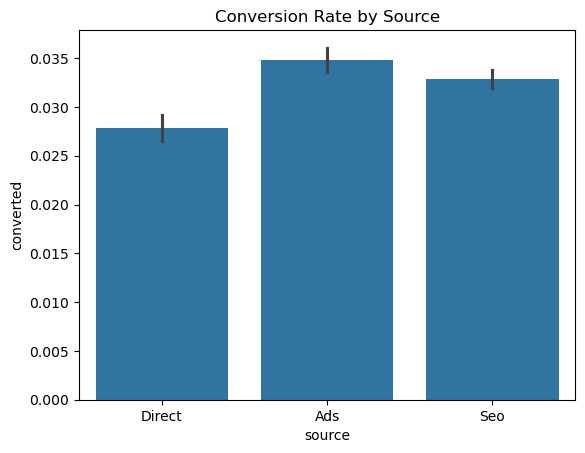

In [53]:
#Conversion Rate by Source
sns.barplot(x='source', y='converted', data=train_df)
plt.title('Conversion Rate by Source')
plt.show()

Ads and SEO perform better than Direct.

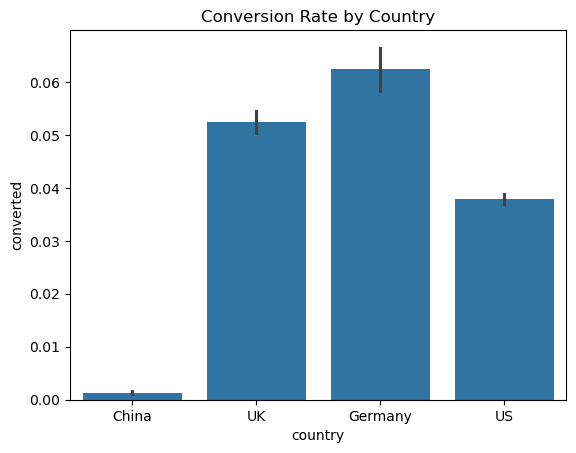

In [54]:
#Conversion Rate by Country
sns.barplot(x='country', y='converted', data=train_df)
plt.title('Conversion Rate by Country')
plt.show()


Germany and UK convert best.
China converts almost not at all — very different behavior.

# Part 2 : Preprocessing and Train/Test Split

In [55]:
# Remove outliers 

train_df['age'].describe()

count    284580.000000
mean         30.564203
std           8.266789
min          17.000000
25%          24.000000
50%          30.000000
75%          36.000000
max         123.000000
Name: age, dtype: float64

In [56]:
# remove rows where age >90
train_df = train_df[train_df['age'] <= 90]
train_df


,country,age,new_user,source,total_pages_visited,converted
0,China,22,1,Direct,2,0
1,UK,21,1,Ads,3,0
2,Germany,20,0,Seo,14,1
3,US,23,1,Seo,3,0
4,US,28,1,Direct,3,0
...,...,...,...,...,...,...
284575,US,36,1,Ads,1,0
284576,US,31,1,Seo,2,0
284577,US,41,1,Seo,5,0
284578,US,31,1,Direct,4,0


In [57]:
train_df['log_total_pages'] = np.log1p(train_df['total_pages_visited'])


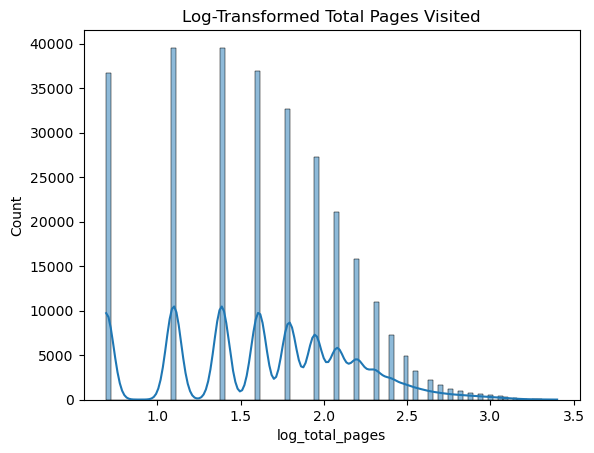

In [58]:
sns.histplot(train_df['log_total_pages'], kde=True)
plt.title("Log-Transformed Total Pages Visited")
plt.show()


In [ ]:

df_model = train_df.copy()

# Drop the original 'total_pages_visited' (we replaced it with log version)
df_model.drop(columns=['total_pages_visited'], inplace=True)

df_model.head()


,country,age,new_user,source,converted,log_total_pages
0,China,22,1,Direct,0,1.098612
1,UK,21,1,Ads,0,1.386294
2,Germany,20,0,Seo,1,2.708050
3,US,23,1,Seo,0,1.386294
4,US,28,1,Direct,0,1.386294


In [60]:
df_model.info()
df_model.describe()


<class 'pandas.core.frame.DataFrame'>
Index: 284578 entries, 0 to 284579
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   country          284578 non-null  object 
 1   age              284578 non-null  int64  
 2   new_user         284578 non-null  int64  
 3   source           284578 non-null  object 
 4   converted        284578 non-null  int64  
 5   log_total_pages  284578 non-null  float64
dtypes: float64(1), int64(3), object(2)
memory usage: 15.2+ MB


,age,new_user,converted,log_total_pages
count,284578.000000,284578.000000,284578.000000,284578.000000
mean,30.563596,0.685457,0.032251,1.620348
std,8.263627,0.464334,0.176667,0.552219
min,17.000000,0.000000,0.000000,0.693147
25%,24.000000,0.000000,0.000000,1.098612
50%,30.000000,1.000000,0.000000,1.609438
75%,36.000000,1.000000,0.000000,2.079442
max,79.000000,1.000000,1.000000,3.401197


In [ ]:
from sklearn.model_selection import train_test_split

# Define target and features
target = 'converted'
X = df_model.drop(columns=[target])  
y = df_model[target]

# Stratified train-test split to preserve class balance
x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0, stratify=y
)

#Random_state : Controls the shuffling applied to the data before applying the split #Stratify :  #Then both sets will keep the same 5% conversion rate: #Training set: 700 users → about 35 converted #Test set: 300 users → about 15 converted #Using stratify=y makes sure the model sees and is tested on representative data — especially important for imbalanced datasets like yours.

In [62]:
Features_list = ['country','age','new_user','log_total_pages']
numeric_features = ['age', 'new_user', 'log_total_pages']
categorical_features = ['country']
target = 'converted'

In [63]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Build the preprocessing pipeline
preprocessor = ColumnTransformer([
    ('num', Pipeline([
        ('imputer', KNNImputer()),          # Fill missing numeric values
        ('scaler', StandardScaler())        # Standardize numeric features
    ]), numeric_features),
    
    ('cat', Pipeline([
        ('imputer', SimpleImputer(strategy='constant', fill_value='UNKNOWN')),  # Fill missing cats
        ('encoder', OneHotEncoder(drop='first'))                                # One-hot encode categorical
    ]), categorical_features)
])

# Fit the transformer on training data and transform both sets
preprocessor.fit(x_train)
x_train = preprocessor.transform(x_train)
x_test = preprocessor.transform(x_test)

#  Part 3 — Baseline Logistic Regression Model

In [114]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    ConfusionMatrixDisplay,

)

In [115]:
classifier = LogisticRegression()
classifier.fit(x_train, y_train)

LogisticRegression()

In [66]:
print("Predictions on training set...")
Y_train_pred = classifier.predict(x_train)
print("...Done.")
print(Y_train_pred)


Predictions on training set...
...Done.
[0 0 0 ... 0 0 0]


In [67]:
print("Probabilities on training set...")
Y_train_proba = classifier.predict_proba(x_train)
print("...Done.")
print(Y_train_proba)


Probabilities on training set...
...Done.
[[9.99995915e-01 4.08517548e-06]
 [9.99926995e-01 7.30045103e-05]
 [9.99947144e-01 5.28564612e-05]
 ...
 [9.99999913e-01 8.68875276e-08]
 [8.57279638e-01 1.42720362e-01]
 [9.95370676e-01 4.62932449e-03]]


In [68]:
print("Predictions on test set...")
Y_test_pred = classifier.predict(x_test)
print("...Done.")
print(Y_test_pred)


Predictions on test set...
...Done.
[0 1 0 ... 0 0 0]


In [69]:
print("Probabilities on test set...")
Y_test_proba = classifier.predict_proba(x_test)
print("...Done.")
print(Y_test_proba)


Probabilities on test set...
...Done.
[[9.99978787e-01 2.12126321e-05]
 [1.08340899e-03 9.98916591e-01]
 [9.99780757e-01 2.19243029e-04]
 ...
 [9.99995369e-01 4.63131049e-06]
 [9.97756362e-01 2.24363757e-03]
 [9.90442057e-01 9.55794262e-03]]


In [70]:
print("f1-score on train set:", f1_score(y_train, Y_train_pred))
print("f1-score on test set:", f1_score(y_test, Y_test_pred))


f1-score on train set: 0.7662559890485968
f1-score on test set: 0.7583316703252844


The model achieved an F1-score of 0.766 on the training set and 0.758 on the test set, showing consistent performance.

#  Part 4 — Feature engineering

In [116]:
# 1. Interaction between age and new_user
df_model['age_new_user'] = df_model['age'] * df_model['new_user']

# 2. Interaction between log_total_pages and new_user
df_model['logpages_new_user'] = df_model['log_total_pages'] * df_model['new_user']

df_model.head()

,country,age,new_user,source,converted,log_total_pages,age_new_user,logpages_new_user,is_young,is_engaged,age_group
0,China,22,1,Direct,0,1.098612,22,1.098612,1,0,18-30
1,UK,21,1,Ads,0,1.386294,21,1.386294,1,0,18-30
2,Germany,20,0,Seo,1,2.708050,0,0.000000,1,1,18-30
3,US,23,1,Seo,0,1.386294,23,1.386294,1,0,18-30
4,US,28,1,Direct,0,1.386294,28,1.386294,1,0,18-30


In [72]:
Features_list = [
    'country',           # categorical
    'age',               # numeric
    'new_user',          # numeric
    'log_total_pages',   # numeric
    'age_new_user',      # new numeric
    'logpages_new_user'  # new numeric
]


In [73]:
X = df_model[Features_list]
y = df_model[target]

x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0, stratify=y
)

In [74]:
numeric_features = [
    'age', 'new_user', 'log_total_pages',
    'age_new_user', 'logpages_new_user'
]

categoric_features = ['country']


In [75]:
preprocessor.fit(x_train)
x_train = preprocessor.transform(x_train)
x_test = preprocessor.transform(x_test)

In [76]:
# Initialize and train the model
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [77]:
# Predict
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

# Evaluate
f1_train = f1_score(y_train, y_pred_train)
f1_test = f1_score(y_test, y_pred_test)

print("F1-score on train set:", f1_train)
print("F1-score on test set:", f1_test)


F1-score on train set: 0.7662559890485968
F1-score on test set: 0.7583316703252844


The model performance didn't improve, so these two features didn't add major predictive power

In [81]:
#Let's try new features 

# 1️⃣ Create a binary flag: is_young (under 30 years old)
df_model['is_young'] = (df_model['age'] < 30).astype(int)

# 2️⃣ Create a binary flag: is_engaged (log_total_pages > 2)
# Idea: users who view many pages may be more likely to convert
df_model['is_engaged'] = (df_model['log_total_pages'] > 2).astype(int)

# 3️⃣ Create a categorical feature: age_group
# Bins: 18–30, 31–40, 41–50, 51+
df_model['age_group'] = pd.cut(
    df_model['age'],
    bins=[0, 30, 40, 50, 100],
    labels=['18-30', '31-40', '41-50', '51+']
)


In [84]:

# 🧩 Update the list of features used in modeling

Features_list = [
    'country',            # categorical
    'age',                # numeric
    'new_user',           # numeric
    'log_total_pages',    # numeric
    'age_new_user',       # engineered numeric
    'logpages_new_user',  # engineered numeric
    'is_young',           # new binary feature
    'is_engaged',         # new binary feature
    'age_group'           # new categorical feature
]


In [85]:

numeric_features = [
    'age', 'new_user', 'log_total_pages',
    'age_new_user', 'logpages_new_user',
    'is_young', 'is_engaged'
]

categoric_features = ['country', 'age_group']


In [86]:
# 🎯 Define input features and target variable
X = df_model[Features_list]
y = df_model['converted']

In [87]:

x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0, stratify=y
)


In [88]:
# 🧼 Fit the existing preprocessor on the updated training set
preprocessor.fit(x_train)

# 🔁 Transform both training and test data
x_train = preprocessor.transform(x_train)
x_test = preprocessor.transform(x_test)


In [89]:

# 🚀 Train model
model = LogisticRegression()
model.fit(x_train, y_train)

# 🧾 Make predictions
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

# 🎯 Evaluate F1-score
f1_train = f1_score(y_train, y_pred_train)
f1_test = f1_score(y_test, y_pred_test)

print("F1-score on train set:", f1_train)
print("F1-score on test set:", f1_test)


F1-score on train set: 0.7662559890485968
F1-score on test set: 0.7583316703252844


# Part 5 : GridSearchCV for Logistic Regression

In [91]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters to try
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear']  # supports both l1 and l2
}

In [92]:
# Run grid search to optimize F1-score
gridsearch = GridSearchCV(
    LogisticRegression(),
    param_grid=param_grid,
    scoring='f1',
    cv=5,
    n_jobs=-1,
    verbose=1
)

gridsearch.fit(x_train, y_train)


Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear']},
             scoring='f1', verbose=1)

In [ ]:
# Best hyperparameters and score from cross-validation
print("Best parameters:", gridsearch.best_params_)
print("Best cross-validated F1-score:", gridsearch.best_score_)

Best parameters: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Best cross-validated F1-score: 0.7655760970468352


In [94]:
# Evaluate best model on test data
best_model = gridsearch.best_estimator_

y_pred_test = best_model.predict(x_test)
f1_test = f1_score(y_test, y_pred_test)

print("F1-score on test set with best model:", f1_test)


F1-score on test set with best model: 0.7582768248903071


Logistic regression model is already well-tuned with default settings.

The current feature set (including the engineered ones) gives the model a solid base.

Regularization (penalty + C) didn’t change much — meaning your model isn’t overfitting or underfitting.

# Part 6 — Train a Decision Tree Model

In [96]:
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier(random_state=0)
tree_model.fit(x_train, y_train)



DecisionTreeClassifier(random_state=0)

In [97]:
# Predict
y_pred_train = tree_model.predict(x_train)
y_pred_test = tree_model.predict(x_test)

# Evaluate
f1_train = f1_score(y_train, y_pred_train)
f1_test = f1_score(y_test, y_pred_test)

print("F1-score on train set (Tree):", f1_train)
print("F1-score on test set (Tree):", f1_test)


F1-score on train set (Tree): 0.7838586768271563
F1-score on test set (Tree): 0.7318752531389227


Tree model is overfitting (F1- score of train)> (F1-score of test) → it performs very well on training data but worse on test set

# Part 7: Tune the Decision Tree using GridSearchCV

In [98]:
# Define hyperparameters to try
param_grid = {
    'max_depth': [3, 5, 10, None],              # How deep the tree can grow
    'min_samples_split': [2, 5, 10],            # Min samples to split a node
    'min_samples_leaf': [1, 2, 4]               # Min samples at a leaf
}

In [99]:
grid_tree = GridSearchCV(
    DecisionTreeClassifier(random_state=0),
    param_grid=param_grid,
    scoring='f1',
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid_tree.fit(x_train, y_train)


Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 10, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='f1', verbose=1)

In [101]:
print("Best parameters:", grid_tree.best_params_)
print("Best cross-validated F1-score:", grid_tree.best_score_)

# Use the best model
best_tree = grid_tree.best_estimator_

# Predict on test set
y_pred_test = best_tree.predict(x_test)

f1_test = f1_score(y_test, y_pred_test)
print("F1-score on test set (Tuned Tree):", f1_test)


Best parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best cross-validated F1-score: 0.7508407579548252
F1-score on test set (Tuned Tree): 0.7497010761259466


# Part 8: Build and tune a RandomForestClassifier 

In [102]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the model
rf_model = RandomForestClassifier(random_state=0)
rf_model.fit(x_train, y_train)

# Predict on test set
y_pred_train = rf_model.predict(x_train)
y_pred_test = rf_model.predict(x_test)

# Evaluate
f1_train = f1_score(y_train, y_pred_train)
f1_test = f1_score(y_test, y_pred_test)

print("F1-score on train set (Random Forest):", f1_train)
print("F1-score on test set (Random Forest):", f1_test)


F1-score on train set (Random Forest): 0.7863379558294813
F1-score on test set (Random Forest): 0.7401794616151546


In [103]:
#Tune the Random Forest using GridSearchCV

# Define parameters to test
param_grid = {
    'n_estimators': [100, 200],         # Number of trees
    'max_depth': [5, 10, None],         # Max tree depth
    'min_samples_split': [2, 5, 10],    # Min samples to split a node
    'min_samples_leaf': [1, 2, 4]       # Min samples required at a leaf
}


In [104]:
grid_rf = GridSearchCV(
    RandomForestClassifier(random_state=0),
    param_grid=param_grid,
    scoring='f1',
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid_rf.fit(x_train, y_train)


Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [5, 10, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200]},
             scoring='f1', verbose=1)

In [105]:
# View best parameters and F1-score from cross-validation
print("Best parameters:", grid_rf.best_params_)
print("Best cross-validated F1-score:", grid_rf.best_score_)

# Predict on test set with the best model
best_rf = grid_rf.best_estimator_
y_pred_test = best_rf.predict(x_test)

f1_test = f1_score(y_test, y_pred_test)
print("F1-score on test set (Tuned Random Forest):", f1_test)


Best parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
Best cross-validated F1-score: 0.7587864829656009
F1-score on test set (Tuned Random Forest): 0.7546497823506134


#  Part 10: XGBoost Classifier 

In [106]:
! pip install xgboost


In [107]:
from xgboost import XGBClassifier


# Initialize the model
xgb_model = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',     # suppresses warning
    random_state=0
)

# Train the model
xgb_model.fit(x_train, y_train)

# Predict
y_pred_train = xgb_model.predict(x_train)
y_pred_test = xgb_model.predict(x_test)

# Evaluate
f1_train = f1_score(y_train, y_pred_train)
f1_test = f1_score(y_test, y_pred_test)

print("F1-score on train set (XGBoost):", f1_train)
print("F1-score on test set (XGBoost):", f1_test)


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [10:34:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


F1-score on train set (XGBoost): 0.7758327668252889
F1-score on test set (XGBoost): 0.7543581616481775


# Part 11: Tune XGBoost with GridSearchCV

In [108]:
param_grid = {
    'n_estimators': [100, 200],         # number of trees
    'max_depth': [3, 5, 7],             # tree depth
    'learning_rate': [0.01, 0.1, 0.3],  # how fast it learns
    'subsample': [0.8, 1]               # % of rows used per tree (helps generalization)
}


In [109]:


# Define the model
xgb = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=0
)

# Run GridSearch
grid_xgb = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='f1',
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid_xgb.fit(x_train, y_train)


Fitting 5 folds for each of 36 candidates, totalling 180 fits


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [10:36:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [10:36:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [10:36:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [10:36:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packa

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=0, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.3],
                         'max_depth': [3, 5, 7], 'n_estimators': [100, 200],
                         'subsample': [0.8, 1]},
             scoring='f1', verbose=1)

In [110]:
# Check best parameters and best score from CV
print("Best parameters:", grid_xgb.best_params_)
print("Best cross-validated F1-score:", grid_xgb.best_score_)

# Evaluate on test set
best_xgb = grid_xgb.best_estimator_
y_pred_test = best_xgb.predict(x_test)

f1_test = f1_score(y_test, y_pred_test)
print("F1-score on test set (Tuned XGBoost):", f1_test)


Best parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.8}
Best cross-validated F1-score: 0.7643384935181634
F1-score on test set (Tuned XGBoost): 0.7600472813238771


F1-score on train set: 0.7716028464927144
F1-score on test set: 0.7600472813238771



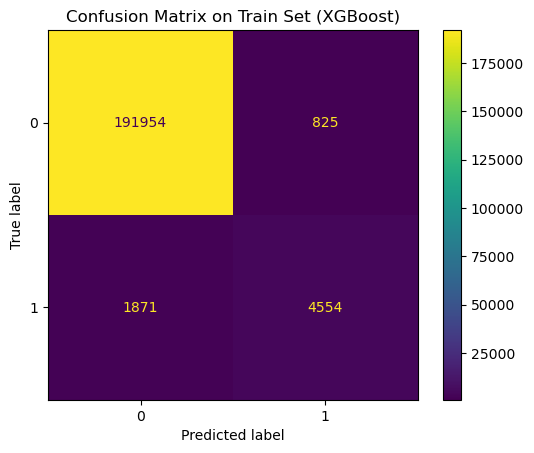

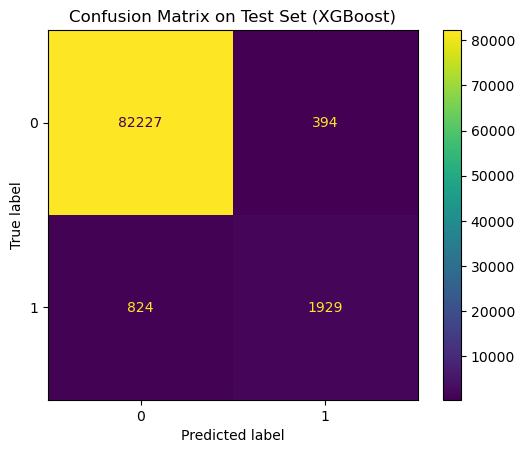

In [113]:
from sklearn.metrics import ConfusionMatrixDisplay, f1_score

# Predict
Y_train_pred = best_xgb.predict(x_train)
Y_test_pred = best_xgb.predict(x_test)

# F1 scores
print("F1-score on train set:", f1_score(y_train, Y_train_pred))
print("F1-score on test set:", f1_score(y_test, Y_test_pred))
print()

# Confusion matrix – Train
_, ax = plt.subplots()
ax.set(title="Confusion Matrix on Train Set (XGBoost)")
ConfusionMatrixDisplay.from_estimator(best_xgb, x_train, y_train, ax=ax)
plt.show()

# Confusion matrix – Test
_, ax = plt.subplots()
ax.set(title="Confusion Matrix on Test Set (XGBoost)")
ConfusionMatrixDisplay.from_estimator(best_xgb, x_test, y_test, ax=ax)
plt.show()


19,154/8227 users correctly predicted as non-converters
4,554/1929  actual converters correctly identified

825/394 users were wrongly predicted as converters
1,871/824 actual converters were missed (false negatives)

In [111]:

model_results = pd.DataFrame({
    'Model': [
        'Logistic Regression',
        'Tuned Decision Tree',
        'Tuned Random Forest',
        'Tuned XGBoost'
    ],
    'F1-Score (Train)': [
        0.766,  # your logistic result
        0.783,  # decision tree
        0.786,  # random forest
        0.776   # xgboost
    ],
    'F1-Score (Test)': [
        0.758,  # logistic
        0.750,  # decision tree
        0.755,  # rf
        0.760   # xgb
    ]
})

# Sort by Test Score (optional)
model_results.sort_values(by='F1-Score (Test)', ascending=False, inplace=True)

# Display the table
model_results.reset_index(drop=True, inplace=True)
display(model_results)


,Model,F1-Score (Train),F1-Score (Test)
0,Tuned XGBoost,0.776,0.760
1,Logistic Regression,0.766,0.758
2,Tuned Random Forest,0.786,0.755
3,Tuned Decision Tree,0.783,0.750


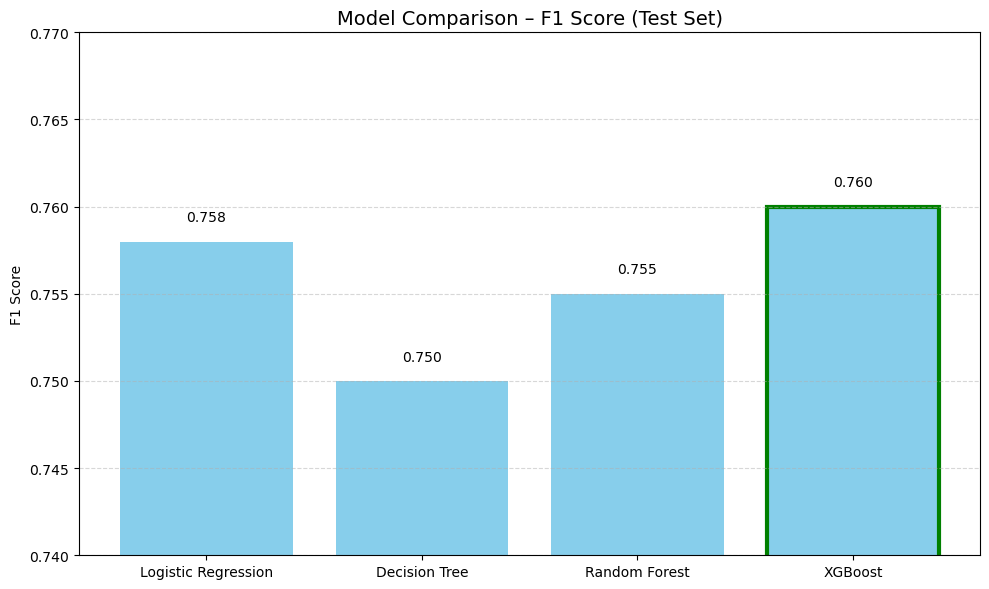

In [112]:


# Model names and F1-scores
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost']
f1_scores = [0.758, 0.750, 0.755, 0.760]

# Create bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(models, f1_scores, color='skyblue')

# Highlight best model (XGBoost)
bars[-1].set_edgecolor('green')
bars[-1].set_linewidth(3)

# Add value labels on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.001, f"{yval:.3f}", 
             ha='center', va='bottom', fontsize=10)

# Add labels and title
plt.title('Model Comparison – F1 Score (Test Set)', fontsize=14)
plt.ylabel('F1 Score')
plt.ylim(0.74, 0.77)
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


# 📊 F1-Score Interpretation for “Converted”

A test F1-score of ~0.76 (with XGBoost) means:

When the model predicts that a user will convert, it is correct in about 76% of the balanced sense — meaning it has a solid balance between catching converters and avoiding false positives.

## Final Conclusion
Throughout this project, we tested several models to predict whether a website visitor would convert. We started with a simple logistic regression and gradually added improvements: better preprocessing, feature engineering, and model tuning.

After trying decision trees, random forests, and finally XGBoost, we found that XGBoost gave us the best performance, with an F1-score of 0.76 on the test set.

This model was able to capture important patterns in the data, especially the interaction between age, user behavior, and page views.

 Key Insight: Younger users who browse more pages are more likely to convert.
 Business Impact: This allows marketing teams to focus their efforts on users with the highest conversion potential.